In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
df_wine = pd.read_csv('data/wine.csv', index_col=0) # Ilk sutunda gelen indexleri bastan cikarmak icin, default sekli "None"

In [3]:
df_wine.type = df_wine.type.map({'white':0, 'red':1})

In [4]:
df_wine.quality_range.value_counts()

1    4113
0    2384
Name: quality_range, dtype: int64

In [5]:
df_wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_range
0,0,7.0,0.27,0.36,17.2,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


# A. Wine Quality CLASSIFICATION

In [6]:
X = df_wine.drop('quality_range', axis=1)
y = df_wine.quality_range

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size=0.2, random_state=40)

# 1. KNN'de Performansı Ölçme
# 1.1. score() metodu ile modeli değerlendirme

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# 2.2. Ağırlıklandırma (weights='distance')
Mesafeler hakkında konuşacağımız son konu ise ağırlıklandırmadır. KNN'nin sıradan versiyonunda,  
k sayıdaki bütün gözlemlerin test gözlemi çıktısına olan etkisi eşit olmalıdır. Eğer veriler yoğun olarak yerleştirilmişse bu, çok problem değildir.

Fakat bazı zamanlar en yakın k gözlemi, test noktasına göre uzaklıkları itibariyle benzer olmayabiliyor. Bu durumlarda mesafe ile ağırlıklandırma kullanışlı olabilir. İşlevsel olarak mesafenin tersi ile ağırlıklandırmak gerekir. Bu sayede en yakın noktalar (yakın mesafeler) diğerlerine göre ağırlıkta daha fazla etkiye sahip olacaktır.

Sklearn ile bunu uygulamak oldukça kolaydır. Modeli tanımlarken kullanabileceğiniz opsiyonel ağırlık parametresi vardır. Parametre olarak mesafeyi ayarlayın ve mesafe ağırlıklandırmasını kullanın.

Şimdi aşağıdaki örnek üzerinde çalışalım ve modelimize etkilerini gözlemleyelim. Bu örnekte SciPy kütüphanesinden statmodels modülünü kullanarak z-score verilerini elde edip kullanalım. Burada modeli tanımlarken komşu sayısı olarak 5, ağırlık olarak da distance değerini girelim.

### KNN n_neighbors=3
#### Agirlikli

In [10]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

In [11]:
knn.score(X_test, y_test)

0.640561862613046

In [12]:
knn.score(X_train, y_train)

1.0

### KNN n_neighbors=3
#### Agirliksiz

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [14]:
knn.score(X_test, y_test)

0.624206272849721

In [15]:
knn.score(X_train, y_train)

0.8353846153846154

### KNN n_neighbors=2

In [16]:
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='distance')

In [18]:
knn.score(X_test, y_test)

0.6342120454108139

### KNN n_neighbors=2
#### Agirliksiz

In [19]:
knn = KNeighborsClassifier(n_neighbors=2)

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [21]:
knn.score(X_test, y_test)

0.5770636905907254

In [22]:
knn.score(X_train, y_train)

0.8492307692307692

### KNN n_neighbors=5
#### Agirlikli

In [23]:
knn= KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [24]:
knn.score(X_test, y_test)

0.6519145660958245

Bu sefer veri çerçevemizi gerçek değerler yerine Z-score'ları ile dolduracağız.

In [25]:
from scipy import stats

In [26]:
X = pd.DataFrame({'alcohol'          :stats.zscore(df_wine.alcohol),
                  'fixed_acidity'    :stats.zscore(df_wine.fixed_acidity),
                  'volatile_acidity' :stats.zscore(df_wine.volatile_acidity),
                  'citric_acid'      :stats.zscore(df_wine.citric_acid),
                  'residual_sugar'   :stats.zscore(df_wine.residual_sugar),
                  'chlorides'        :stats.zscore(df_wine.chlorides),
                  'free_sulfur_dioxide' :stats.zscore(df_wine.free_sulfur_dioxide),
                  'total_sulfur_dioxide':stats.zscore(df_wine.total_sulfur_dioxide),
                  'density'          :stats.zscore(df_wine.density),
                  'pH'               :stats.zscore(df_wine.pH),
                  'sulphates'        :stats.zscore(df_wine.sulphates),
                  'type'             : stats.zscore(df_wine.type)})

In [27]:
X.head(2)

,alcohol,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,type
0,-1.420398,-0.167159,-0.431939,0.295141,2.567931,-0.377347,0.860316,0.967468,2.146664,-1.369904,-0.575460,-0.571367
1,-0.832456,-0.707427,-0.238754,0.154541,-0.827454,-0.218556,-0.963090,0.291092,-0.234264,0.515698,-0.282485,-0.571367


In [28]:
X_zscore = stats.zscore(X)

X_train, X_test, y_train, y_test = train_test_split(X_zscore, y, test_size=0.2, random_state = 40)

knn.fit(X_train,y_train)
print (knn.score(X_test, y_test))
print (knn.score(X_train,y_train))

0.8223076923076923
1.0


Burada da ayni formulun farkli yazimiyla daha yuksek bir sonuc aldik. 

### KNN n_neighbors=5
#### Agirliksiz

In [29]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
knn.score(X_test, y_test)

0.7769230769230769

In [31]:
knn.score(X_train, y_train)

0.8358668462574562

Modelimiz agirlikli knn test verisinde %65'lik bir başarı yakaladı.  n_neighbors 5 degeri ile devam ediyoruz.


# 1.2. Çapraz Doğrulama

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
knn= KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [34]:
#test verilerine en son bakiyoruz, burda X ve y olarak bile yazabiliriz cnk kod tets train ayirip cv kdr 

cvscores_3 = cross_val_score(knn, X_train, y_train, cv=3)
print('cv = 3 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_3))


# Perform 10-fold CV
cvscores_5 = cross_val_score(knn, X_train, y_train, cv=5)
print('cv = 5 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_5))


cvscores_10 = cross_val_score(knn, X_train, y_train, cv=10)
print('cv = 10 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_10))


cvscores_15 = cross_val_score(knn, X_train, y_train, cv=15)
print('cv = 15 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_15))


cvscores_20 = cross_val_score(knn, X_train, y_train, cv=20)
print('cv = 20 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_20))

cvscores_30 = cross_val_score(knn, X_train, y_train, cv=30)
print('cv = 30 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_30))


cvscores_50 = cross_val_score(knn, X_train, y_train, cv=50)
print('cv = 50 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_50))

cv = 3 ---> Ortalama çarpraz doğrulama skoru :  0.7785214883233667
cv = 5 ---> Ortalama çarpraz doğrulama skoru :  0.7892999925964315
cv = 10 ---> Ortalama çarpraz doğrulama skoru :  0.7998836519934787
cv = 15 ---> Ortalama çarpraz doğrulama skoru :  0.8022033890408219
cv = 20 ---> Ortalama çarpraz doğrulama skoru :  0.8004612095991407
cv = 30 ---> Ortalama çarpraz doğrulama skoru :  0.8027550771820255
cv = 50 ---> Ortalama çarpraz doğrulama skoru :  0.8039536967886481


#### Cross Validation Score for Test Values

In [35]:
cvscores_5 = cross_val_score(knn, X_test, y_test, cv=5)
print('cv = 5 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_5))

cv = 5 ---> Ortalama çarpraz doğrulama skoru :  0.747738211876143


In [36]:
from sklearn.model_selection import cross_validate

In [37]:
cvscores_5 = cross_validate(knn, X_train, y_train, cv=5)
#print('cv = 50 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_50))

cvscores_5

{'fit_time': array([0.00399446, 0.00399494, 0.00399661, 0.00400281, 0.        ]),
 'score_time': array([0.07190394, 0.05995226, 0.06391239, 0.06391239, 0.06790853]),
 'test_score': array([0.775     , 0.81153846, 0.79595765, 0.78344562, 0.78055823]),
 'train_score': array([1., 1., 1., 1., 1.])}

#### CV=5 icin Model Degerleri

In [38]:
from sklearn.model_selection import cross_val_predict

In [39]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression()

In [40]:
y_tahmin = cross_val_predict(estimator=lrm, X=X, y=y, cv=5)
print(y_tahmin[0:10])

[0 0 1 1 1 1 0 0 0 1]


# 2.1. Mesafe ve Normalizasyon (StandardScaler())


Test noktamıza, diğer gözlemlerin ne kadar yakın olduğunun ölçülmesine dair konuştuk şu ana kadar. Kullandığımız ölçüm (L2) bütün birimlerin eşit olduğu varsayımını yapar. Böylece önceki örneğimizde, 1 birimlik gürültü şiddeti, bir sonrakinden eşit uzaklıkta.

Birimler genellikle eşittir. Değilse, eşitsizliğin uyarlamasının nasıl yapılacağını anlamak özel ve hassas bir konu. Eğer göreceli ölçekler birbirinden tamamen farklı ise bunu çözebilmek oldukça zor bir iş olacaktır. Örneğin, eğer binalarla ilgileniyorsanız ve elinizde kat yükseklikleri ve yüzey alanları varsa sadece yüzey alanları ile ilgilenen bir modeliniz olmalıdır çünkü bu boyuttaki ölçümlerde kat yüksekliğine göre çok daha fazla sayıda birim olacaktır.

Müzik örneğimize tekrar dönelim. Burada bir herhangi bir normalizasyon yapmadık. 400 sn. uzunluğundaki ve 35 ses şiddetindeki şarkıyı modelimiz jazz olarak tahmin etti. Bu ses şiddetinde herhangi bir rock şarkısı olmamasına rağmen eksenler arasındaki uyumsuzluktan dolayı modelimiz yanlış bir değerlendirmede bulundu.

Uyumlu olmayan bu ölçümlerin ele alınması gerekir. Veri biliminde buna normalizasyon denir. KNN‘de etkin şekilde kullanılan 2 normalizasyon metodu bulunmaktadır:

Verilerin sınırları 0 ila 1 arasında olacak şekilde her değişkeni bu sınırlar içinde tekrardan ölçeklendirirsiniz (-1 ila 1 arasında yapmak da makul olabilir). Bu şekilde her veri kendi sınıfındaki max. ve min noktalarına uzaklığı ile görülebilir. Eğer veriler lineer bir benzerlik gösteriyorsa bu en iyisi olabilir. Ayrıca veri setinin bilinen bir sınır içinde olduğunu bilmek iyi olacaktır.
Bunun için ise Sci-learn kütüphanesinin .preprocessing modülünden StandardScaleri kullanabiliriz.

In [41]:
from sklearn.preprocessing import StandardScaler 

In [42]:
ss = StandardScaler() 
X_olcekli = ss.fit_transform(X) 

Şimdi verilerimizi ölçekledikten sonra tekrar eğitim ve test kümesi olarak ayırıp modelimizi oluşturabiliriz.

In [43]:
X_train_olcekli, X_test_olcekli, y_train, y_test = train_test_split(X_olcekli, y, test_size=0.2, random_state = 40)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_olcekli,y_train)
knn.score(X_test_olcekli, y_test)

0.7769230769230769

In [44]:
y_tahmin = knn.predict(X_test)

In [45]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_tahmin))

Accuracy: 0.7769230769230769


Ölçeklendirme sonrası modelimizin başarı yüzdesi %67.99'den %77'a çıktı. 

Diğer bir statndardizasyon yöntemi olarak da her gözlemin ortalamaya olan uzaklığını da hesaplayabilirsiniz. Standart sapma şeklinde gösterilebilir: genellikle z-score olarak bilinir. Z-score’u hesaplamak ve her noktanın ortalamaya uzaklığını hesaplamak sürekli veriler için çalışır.
Her iki teknik de çoğu durumda uygulanabilir. Bir önsezi ile hangisinin daha hassas olduğunu gözlemleyebilirsiniz.

# 3.3. K değerini belirlemek

KNN'in ince ayarlarındaki son önemli nokta  
k
 'yı seçmektir.  
k
 ‘yı seçme bir tercihtir.  
k
  yı daha da büyütmek sizin karar uzayınızı daha düzlemsel yapar. Tahminde daha fazla gözlemin etkisi olacaktır. Daha küçük  
k
 'lar ince oynaklıkları kaldıracaktır.

In [46]:
komsu_sayisi = np.arange(1, 9)
egitim_kumesi_skoru = np.empty(len(komsu_sayisi))
test_kumesi_skoru = np.empty(len(komsu_sayisi))

Bir döngü içerinde 1'den 8'a kadar komşu sayılarını değişerecek ve her bir komşu sayısı için .score() değerlerini alacağız.

In [47]:
for i, k in enumerate(komsu_sayisi):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    egitim_kumesi_skoru[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_kumesi_skoru[i] = knn.score(X_test, y_test)

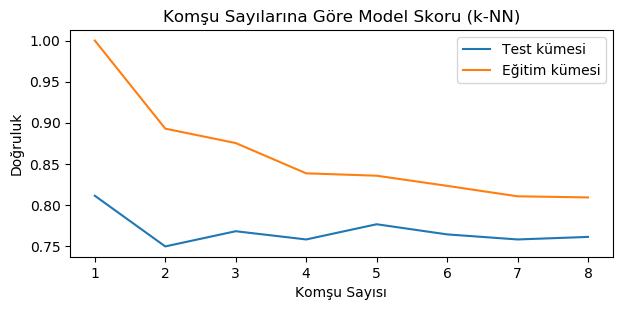

In [48]:
plt.figure(figsize=(7,3), dpi = 100)
plt.plot(komsu_sayisi, test_kumesi_skoru, label = 'Test kümesi')
plt.plot(komsu_sayisi, egitim_kumesi_skoru, label = 'Eğitim kümesi')
plt.legend()
plt.title('Komşu Sayılarına Göre Model Skoru (k-NN)')
plt.xlabel('Komşu Sayısı')
plt.ylabel('Doğruluk')
plt.show()

### StandardScaler veri setimiz ile k degeri kontrol

In [49]:
for i, k in enumerate(komsu_sayisi):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_olcekli, y_train)
    egitim_kumesi_skoru[i] = knn.score(X_train_olcekli, y_train)

    #Compute accuracy on the testing set
    test_kumesi_skoru[i] = knn.score(X_test_olcekli, y_test)

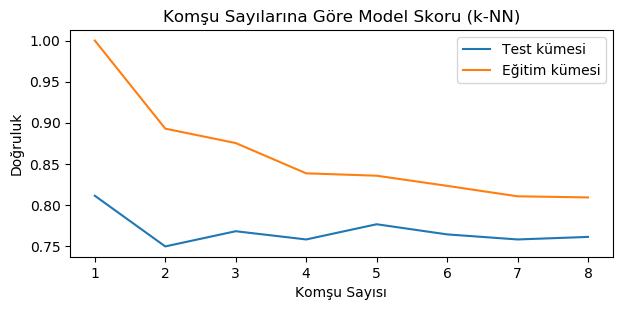

In [50]:
plt.figure(figsize=(7,3), dpi = 100)
plt.plot(komsu_sayisi, test_kumesi_skoru, label = 'Test kümesi')
plt.plot(komsu_sayisi, egitim_kumesi_skoru, label = 'Eğitim kümesi')
plt.legend()
plt.title('Komşu Sayılarına Göre Model Skoru (k-NN)')
plt.xlabel('Komşu Sayısı')
plt.ylabel('Doğruluk')
plt.show()

### 3. *k*-NN ile regresyon 
KNN’yi regresyona çevirmek basit bir işlemdir. Daha önceki modelimizde, her bir  k gözlemi bir kategoriye atanmıştı. Regresyonda bunun yerine bir değere atanır. En popüler tepkiyi almak yerine, algoritma bütün oyların ortalamasını alır. Eğer ağırlıkları varsa, ağırlıklı ortalama alabilirsiniz.


k-NN regresyon algoritması için Scikit-learn kütüphanesinden neighbors modülünü ve buradan da KNeighborsRegressor modelini kullanacağız.

In [51]:
from sklearn.neighbors import KNeighborsRegressor

#### Wine Seti icin 

In [52]:
knn = KNeighborsRegressor(n_neighbors=5)
X = pd.DataFrame(df_wine.drop('quality_range', axis=1))
y = df_wine.quality_range
knn.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [53]:
X.max()

type                      1.00000
fixed_acidity            15.90000
volatile_acidity          0.78000
citric_acid               0.74000
residual_sugar           17.20000
chlorides                 0.15200
free_sulfur_dioxide      81.00000
total_sulfur_dioxide    260.00000
density                   1.00315
pH                        3.69000
sulphates                 0.95000
alcohol                  13.80000
dtype: float64

In [54]:
len(y_train)

5197

In [55]:
y_tahmin = knn.predict(X_test)
y_tahmin

array([0. , 0.2, 0. , ..., 0. , 0.2, 0.2])

In [56]:
y_test.head()

369     0
6243    1
3374    0
1009    1
220     0
Name: quality_range, dtype: int64

# B. Life Expectancy ile Regresyon

In [57]:
df_life = pd.read_csv('data/LifeExpectancy.csv', index_col=0)

### KNN n_neighbors=7

In [58]:
knn = KNeighborsRegressor(n_neighbors=7)
X = pd.DataFrame(df_life.drop('Life_Expectancy', axis=1))
y = df_life.Life_Expectancy 
knn.fit(X, y) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='uniform')

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='uniform')

In [60]:
knn.score(X_train,y_train)

0.7714315726361353

### KNN n_neighbors=5

In [61]:
knn = KNeighborsRegressor(n_neighbors=5)
X = pd.DataFrame(df_life.drop('Life_Expectancy', axis=1))
y = df_life.Life_Expectancy 
knn.fit(X, y) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [63]:
knn.score(X_train,y_train)

0.8035206906057242

### KNN n_neighbors=3

In [64]:
knn = KNeighborsRegressor(n_neighbors=3)
X = pd.DataFrame(df_life.drop('Life_Expectancy', axis=1))
y = df_life.Life_Expectancy 
knn.fit(X, y) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [66]:
knn.score(X_train,y_train)

0.859454157039738

### KNN n_neighbors=3
### Agirlikli

In [67]:
knn = KNeighborsRegressor(n_neighbors=3, weights='distance')
X = pd.DataFrame(df_life.drop('Life_Expectancy', axis=1))
y = df_life.Life_Expectancy 
knn.fit(X, y) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='distance')

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='distance')

In [69]:
knn.score(X_train,y_train)

1.0

In [70]:
y_tahmin = knn.predict(X_test)

**Pros**
The training phase of K-nearest neighbor classification is much faster compared to other classification algorithms. There is no need to train a model for generalization, That is why KNN is known as the simple and instance-based learning algorithm. KNN can be useful in case of nonlinear data. It can be used with the regression problem. Output value for the object is computed by the average of k closest neighbors value.

**Cons**
The testing phase of K-nearest neighbor classification is slower and costlier in terms of time and memory. It requires large memory for storing the entire training dataset for prediction. KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes. KNN also not suitable for large dimensional data.

**How to improve KNN?**
For better results, normalizing data on the same scale is highly recommended. Generally, the normalization range considered between 0 and 1. KNN is not suitable for the large dimensional data. In such cases, dimension needs to reduce to improve the performance. Also, handling missing values will help us in improving results.

*https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn*